Import all the needed libraries

In [1]:
import struct
import time
import numpy as np
from sklearn import svm, metrics
from sklearn import datasets
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
import itertools
%matplotlib inline

The following function gets used to plot the confusion matrix using the confusion matrix and the classes

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix. 
    Normalization can be applied by setting normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm. sum (axis=1)[:, np.newaxis] 
        print("Normalized confusion matrix")
    else:    
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product (range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j]> thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

The following function gets used to import the images into a numpy array

In [3]:
def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

The following code imports the images into the respective arrays and flatten them into 1d

In [4]:
raw_train = read_idx("train-images-idx3-ubyte")
train_data = np.reshape(raw_train, (60000, 28*28))
train_label = read_idx("train-labels-idx1-ubyte")
raw_test = read_idx("t10k-images-idx3-ubyte")
test_data = np.reshape(raw_test, (10000, 28*28))
test_label = read_idx("t10k-labels-idx1-ubyte")

This code is the training code that takes the training data and uses it to construct an model capable of classifying all the data.
The training time is also measured to compare the impact of hyperparameter changes.

In [5]:
start = time.time()
X = train_data/255.0
Y = train_label
svc = svm.SVC(C=5, gamma=0.05, kernel='rbf', max_iter=-1, class_weight='balanced', probability = True, cache_size = 5000).fit(X, Y)
end = time.time()
print("SVC Train Time: ", end - start,"s")

SVC Train Time:  5059.383928537369 s


This code saves the trained model to a .pkl file for later use.

In [6]:
pkl_filename = "pickle_svc_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(svc, file)

This code reopens the previously saved model

In [5]:
pkl_filename = "pickle_svc_model.pkl"
with open(pkl_filename, 'rb') as file:
    svc = pickle.load(file)

This code gets used to test the previously trained model and times it for feedback.

In [6]:
start = time.time()
x_test = test_data/255.0
y_true = test_label
y_pred = svc.predict(x_test)
end = time.time()
print("SVC Predict Time: ", end - start,"s")

SVC Predict Time:  227.27567172050476 s


This code constructs a confusion matrix and prints it for visual feedback on the effectiveness of the model.

Confusion matrix, without normalization
[[ 973    0    1    0    0    2    1    1    2    0]
 [   0 1127    3    1    0    1    0    1    2    0]
 [   4    0 1015    0    1    0    0    6    6    0]
 [   0    0    2  995    0    3    0    6    4    0]
 [   0    0    3    0  966    0    4    0    2    7]
 [   2    0    0    5    1  878    2    1    2    1]
 [   4    2    0    0    2    3  946    0    1    0]
 [   0    3   10    1    1    0    0 1004    2    7]
 [   1    0    1    4    1    2    0    2  960    3]
 [   3    3    2    6    9    2    0    5    6  973]]


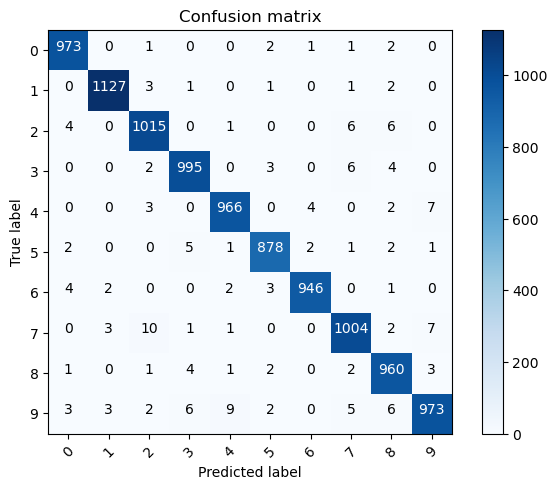

In [10]:
cm = metrics.confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, ["0","1","2","3","4","5","6","7","8","9"]) 

This code tests the model and returns the accuracy score and the time it took to complete

In [11]:
start = time.time()
score = svc.score(x_test, y_true)
print("Test score: {0:.2f} %".format(100 * score))
end = time.time()
print("SVC Score Time: ", end - start, "s")

Test score: 98.37 %
SVC Score Time:  222.8095667362213 s


This code outputs the images of the digits the model miscategorised for visual feedback to the user

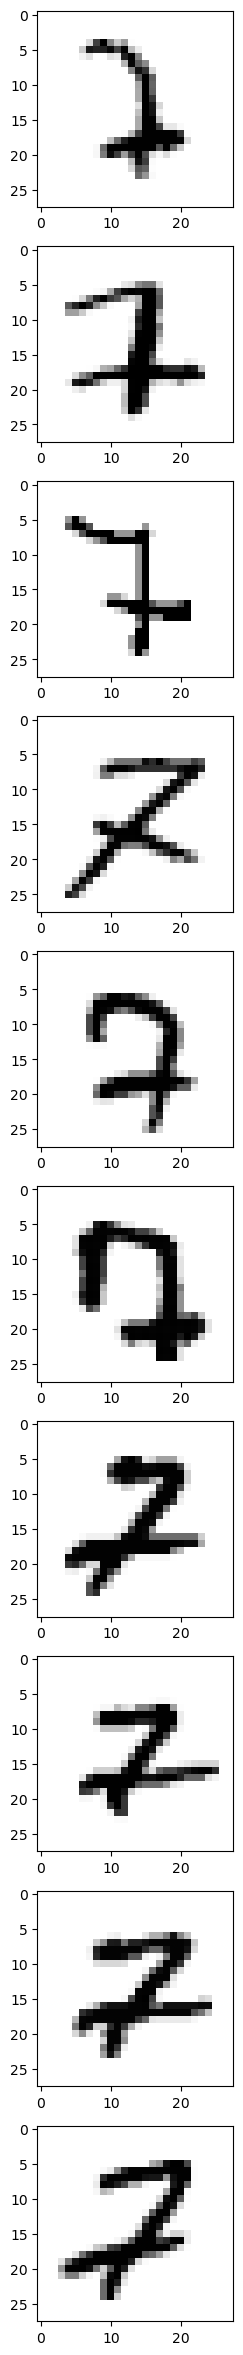

In [7]:
idx = np.where((y_pred == 2) & (y_true == 7))[0]
fig = plt.figure(figsize=(5,30))
for i in range(len(idx)):
    ax = fig.add_subplot(len(idx),1 , i + 1)
    imgplot = ax.imshow(np.reshape(x_test[idx[i],:], (28,28)), cmap=mpl.colormaps['Greys'])
    imgplot.set_interpolation("nearest")
plt.show()

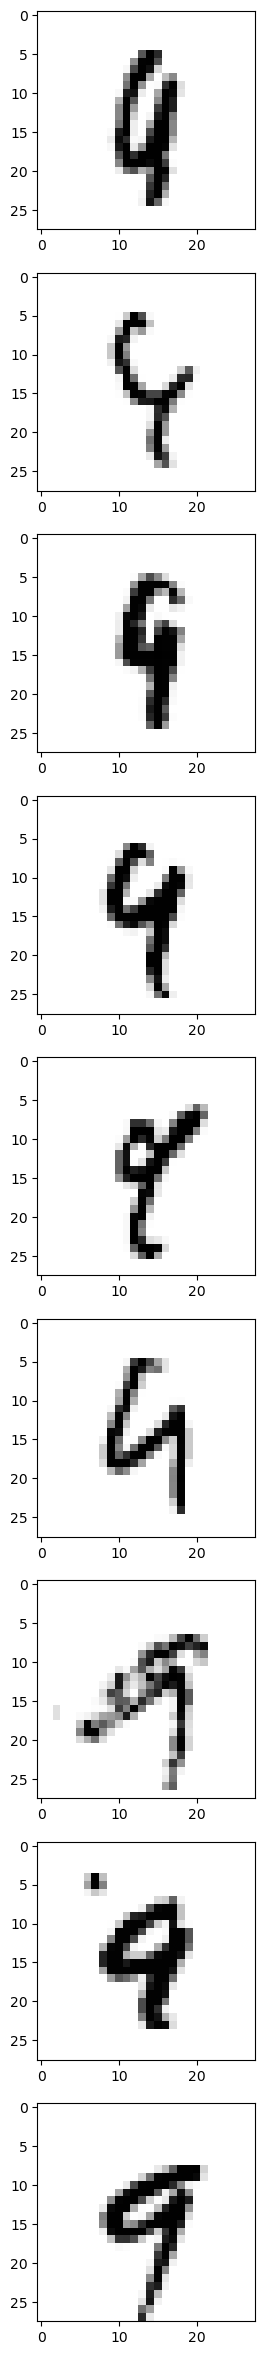

In [13]:
idx = np.where((y_pred == 4) & (y_true == 9))[0]
fig = plt.figure(figsize=(5,30))
for i in range(len(idx)):
    ax = fig.add_subplot(len(idx),1 , i + 1)
    imgplot = ax.imshow(np.reshape(x_test[idx[i],:], (28,28)), cmap=mpl.colormaps['Greys'])
    imgplot.set_interpolation("nearest")
plt.show()